In [6]:
from mastodon import Mastodon

Mastodon.create_app(
    'your_app_name',
    api_base_url = 'https://mastodon.social', #this is determined by your chosen server, if you picked the general server, dont change this line
    to_file = 'your_client_crediential_file_name.secret'
)

('1ZbeDYjnInKYPNELRocMTqkHyrojPS56Kvz57NB4_lM',
 'vISU04KdqfWrIJAcvmK2dBlDbbU30R7Db2iwO1UDd3U')

In [7]:
API = Mastodon(client_id = 'your_client_crediential_file_name.secret',)
API.log_in(
    'abhilash.m.abhilash@student.uva.nl', #no caps
    'qwePOI123',
    to_file = 'your_user_crediential_file_name.secret'
)

'YINmZjjCd51i5RtIFCUSmSrFgDa-Qs9mN76sS_IdpGw'

In [79]:
from IPython.display import HTML #for formatting HTML script
HTML(API.trending_statuses()[0]["content"])

In [201]:
import time

# Function to retrieve toots in a loop with time breaks
def retrieve_toots(query):
    max_id = None
    all_toots = []
    while True:
        search_results = API.search_v2(q=query, max_id=max_id)
        print(f"Retrieved {len(search_results['statuses'])} toots. Total retrieved: {len(all_toots)}")
        if not search_results['statuses']:
            break
        all_toots.extend(search_results['statuses'])
        max_id = search_results['statuses'][-1]['id']
        time.sleep(1)  # Add a 1-second time break before making the next API request
    return all_toots

In [202]:
def retrieve_toots_per_date(query, creation_date):
    max_id = None
    all_toots = []
    while True:
        search_results = API.search_v2(q=query, max_id=max_id)
        print(f"Retrieved {len(search_results['statuses'])} toots. Total retrieved: {len(all_toots)}")
        if not search_results['statuses']:
            break
        for toot in search_results['statuses']:
            if toot['created_at'] > creation_date:
                print(toot['created_at'] and len(all_toots))
                all_toots.append(toot)
        max_id = search_results['statuses'][-1]['id']
    return all_toots

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_toots_per_year(toots_per_year, title):
    # Create a list of years and a list of toots
    years = list(toots_per_year.keys())
    toots = list(toots_per_year.values())

    # Create a bar plot
    sns.barplot(x=years, y=toots)

    # Add a title to the plot
    plt.title("Toots per year " + title)

    # Rotate the x-labels by 45 degrees
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

In [206]:
all_toots_verkiezigen = retrieve_toots("verkiezingen")


Retrieved 20 toots. Total retrieved: 0
Retrieved 20 toots. Total retrieved: 20
Retrieved 20 toots. Total retrieved: 40
Retrieved 20 toots. Total retrieved: 60
Retrieved 20 toots. Total retrieved: 80
Retrieved 20 toots. Total retrieved: 100
Retrieved 20 toots. Total retrieved: 120
Retrieved 20 toots. Total retrieved: 140
Retrieved 20 toots. Total retrieved: 160
Retrieved 20 toots. Total retrieved: 180
Retrieved 20 toots. Total retrieved: 200
Retrieved 20 toots. Total retrieved: 220
Retrieved 20 toots. Total retrieved: 240
Retrieved 20 toots. Total retrieved: 260
Retrieved 20 toots. Total retrieved: 280
Retrieved 20 toots. Total retrieved: 300
Retrieved 20 toots. Total retrieved: 320
Retrieved 20 toots. Total retrieved: 340
Retrieved 20 toots. Total retrieved: 360
Retrieved 20 toots. Total retrieved: 380
Retrieved 20 toots. Total retrieved: 400
Retrieved 20 toots. Total retrieved: 420
Retrieved 20 toots. Total retrieved: 440
Retrieved 20 toots. Total retrieved: 460
Retrieved 20 toots. To

In [216]:
import pandas as pd

def calculate_toots_per_year(all_toots):
    # Create an empty dictionary to store the count of toots per year
    toots_per_year = {}

    # Iterate over each toot in the all_toots list
    for toot in all_toots:
        # Get the creation year of the toot
        creation_year = pd.to_datetime(toot['created_at']).year

        # Increment the count of toots for the corresponding year
        if creation_year in toots_per_year:
            toots_per_year[creation_year] += 1
        else:
            toots_per_year[creation_year] = 1

    # Create a dataframe from the toots_per_year dictionary
    df = pd.DataFrame({'Year': list(toots_per_year.keys()), 'Total Toots': list(toots_per_year.values())})

    # Print the dataframe
    print(df)
    return toots_per_year



In [222]:
# Call the function with the all_toots list
toots_per_year_verkiezigen = calculate_toots_per_year(all_toots_verkiezigen)


   Year  Total Toots
0  2023         1488
1  2022           53
2  2021            5
3  2020            5
4  2019           30
5  2018           16
6  2017            8
7  2016            1


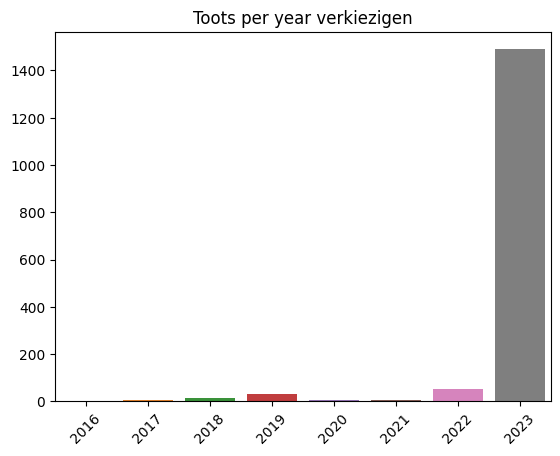

In [223]:
plot_toots_per_year(toots_per_year_verkiezigen, "verkiezigen")

In [224]:
parties = [
["VVD","Volkspartij voor Vrijheid en Democratie"],
["D66", "Democraten 66"],
["GLPvdA", "GL", "PvdA", "groenlinks", "GROENLINKS / Partij van de Arbeid", "GL/PvdA", "GroenLinks/PvdA"],
["PVV", "Partij voor de Vrijheid"],
["CDA", "Christen-Democratisch Appel"],
["SP", "Socialistische Partij"],
["FvD", "Forum voor Democratie"],
["PvdD", "Partij voor de Dieren"],
["CU", "ChristenUnie"],
["Volt"],
["JA21"],
["SGP", "Staatkundig Gereformeerde Partij"],
["DENK"],
["50PLUS"],
["BBB","Boeren Burger Beweging"],
["BIJ1"],
["Piratenpartij", "Piratenpartij – De Groenen", "De Groenen", "PP"],
["BVNL", "Belang van Nederland", "Groep Van Haga"],
["NSC", "Nieuw Sociaal Contract"],
["Splinter"],
["LP", "Libertaire Partij"],
["LEF", "Voor de Nieuwe Generatie"],
["SvN", "Samen voor Nederland"],
["PLAN", "Nederland met een PLAN"],
["PvdS","PartijvdSport"],
["PPvB", "Politieke Partij voor Basisinkomen"],
]

In [226]:
def count_party_mentions(all_toots, parties):
    party_mentions = {}

    for toot in all_toots:
        for party in parties:
            for keyword in party:
                if keyword.lower() in toot['content'].lower():
                    if party[0] in party_mentions:
                        party_mentions[party[0]] += 1
                    else:
                        party_mentions[party[0]] = 1

    return party_mentions

In [227]:
party_mentions = count_party_mentions(all_toots_verkiezigen, parties)
print(party_mentions)


{'SP': 1482, 'NSC': 100, 'DENK': 104, 'VVD': 145, 'PVV': 89, 'Piratenpartij': 172, 'CU': 100, 'GLPvdA': 303, 'PLAN': 47, 'LP': 91, 'D66': 63, 'FvD': 26, 'BBB': 78, 'SGP': 9, 'LEF': 11, 'BIJ1': 48, 'CDA': 56, 'PvdD': 69, 'Splinter': 5, 'JA21': 12, 'Volt': 21, '50PLUS': 7, 'SvN': 2, 'PPvB': 1, 'PvdS': 1, 'BVNL': 6}


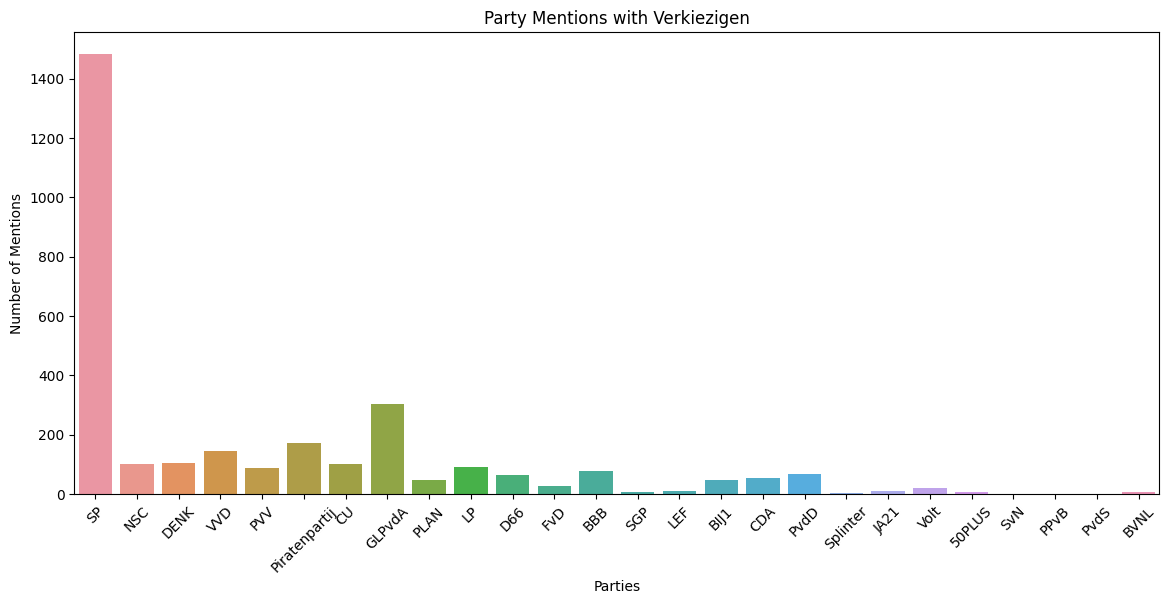

In [234]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create a bar plot
sns.barplot(x=parties, y=mentions)

# Add labels and title to the plot
plt.xlabel('Parties')
plt.ylabel('Number of Mentions')
plt.title('Party Mentions with Verkiezigen')

# Rotate the x-labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [242]:
query_dutch_elections = "dutch elections, verkiezingen, tweedekamer, tweede kamer, kamer, stemmen, stem, stemrecht, #TK2023, #VVD, #D66, #GL, #PvdA, #PVV, #CDA, #SP, #FvD, #PvdD, #CU, #Volt, #JA21, #SGP, #DENK, #50PLUS, #BBB, #BIJ1, #Piratenpartij, #BVNL, #NSC, #Splinter, #LP, #LEF, #SvN, #PLAN, #PvdS, #PPvB"

#query_dutch_elections = "dutch elections, #Piratenpartij)"

In [243]:
all_toots_dutch_elections = []
for word in query_dutch_elections.split(', '):
    all_toots_dutch_elections.extend(retrieve_toots(word))
    print(len(all_toots_dutch_elections) and word)


Retrieved 19 toots. Total retrieved: 0
Retrieved 20 toots. Total retrieved: 19
Retrieved 19 toots. Total retrieved: 39
Retrieved 20 toots. Total retrieved: 58
Retrieved 20 toots. Total retrieved: 78
Retrieved 20 toots. Total retrieved: 98
Retrieved 18 toots. Total retrieved: 118
Retrieved 19 toots. Total retrieved: 136
Retrieved 19 toots. Total retrieved: 155
Retrieved 20 toots. Total retrieved: 174
Retrieved 20 toots. Total retrieved: 194
Retrieved 20 toots. Total retrieved: 214
Retrieved 20 toots. Total retrieved: 234
Retrieved 20 toots. Total retrieved: 254
Retrieved 20 toots. Total retrieved: 274
Retrieved 20 toots. Total retrieved: 294
Retrieved 20 toots. Total retrieved: 314
Retrieved 20 toots. Total retrieved: 334
Retrieved 20 toots. Total retrieved: 354
Retrieved 5 toots. Total retrieved: 374
Retrieved 0 toots. Total retrieved: 379
dutch elections
Retrieved 20 toots. Total retrieved: 0
Retrieved 20 toots. Total retrieved: 20
Retrieved 20 toots. Total retrieved: 40
Retrieved 20 

KeyboardInterrupt: 

In [244]:
print(len(all_toots_dutch_elections))

17529


In [245]:
# Write the all_toots list to a file
with open('all_toots_dutch_elections.txt', 'w') as f:
    for toot in all_toots_dutch_elections:
        f.write("%s\n" % toot)

In [246]:
# Read the all_toots file
with open('all_toots_dutch_elections.txt', 'r') as f:
    all_toots = f.readlines()

# Print the number of toots
print("Number of toots:", len(all_toots))


Number of toots: 17529
